In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#scikit-learn models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#model evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#We want our plots appear inside our notebook
%matplotlib inline

## 1.Problem Definition
Given a set of a house features can we be able to predict it's price.

In [5]:
import statsmodels.api as sm

boston_data = sm.datasets.get_rdataset('Boston', package='MASS')
data = boston_data.data

In [6]:
#view a summary of our loaded data
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The loaded data has no column names hence we shall need to assign it the appropriate column names based on information collected by the U.S Census Service concerning housing in the area of Boston Mass.

## 4. Data Exploration
* The objective here is to find out:
* What questions are you trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add,change or remove features to get more out of your data.

In [8]:
#getting the shape our data in rows and columns
data.shape

(506, 14)

In [9]:
#loading the first 5 rows from our data to get it's summary
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
#loading the last 5 rows from our data to get it's summary
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [11]:
#check the data types in our data
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [12]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Our data does not have missing values and it's composed of floating and integer data types.
In the event there are missing values one needs to replace mssing values (imputing) or remove them especially if comprise of a larger % in a column.

In [13]:
#get the summary description of our data
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### target variable
Our target variable that we want to predict is the house price with a column label  "MEDV" which is the Median value of owner-occupied homes in $1000's

## 5. Data Visualization

#### 5.1(MEDV)House price distribution

<Axes: >

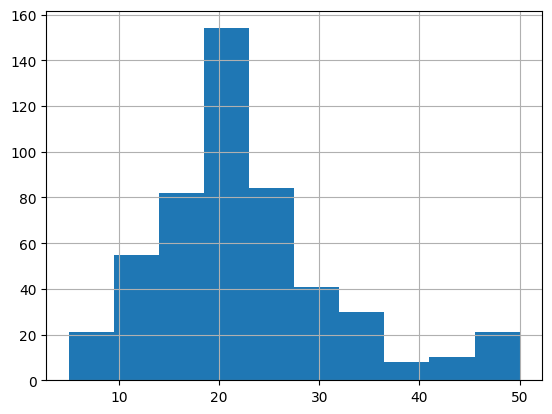

In [15]:
data.medv.hist()

<ipython-input-16-15e51494f6a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['medv'], bins=30)


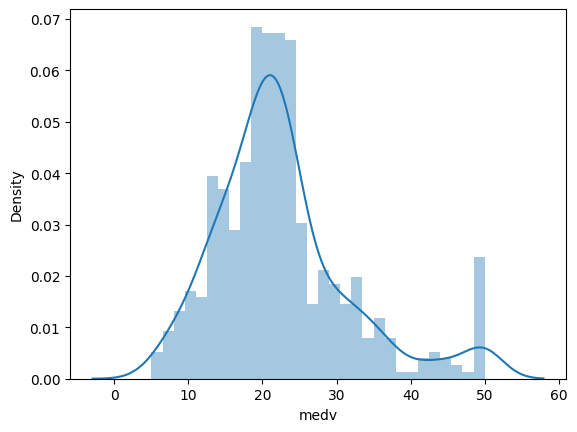

In [16]:
sns.distplot(data['medv'], bins=30)
plt.show()

* On average the distribution of the house prices are between 10 and 50 dollars.
* There those on the extreme (outliers) house prices at dollars over 50.

#### 5.2 House Price vs CRIME Rate by town

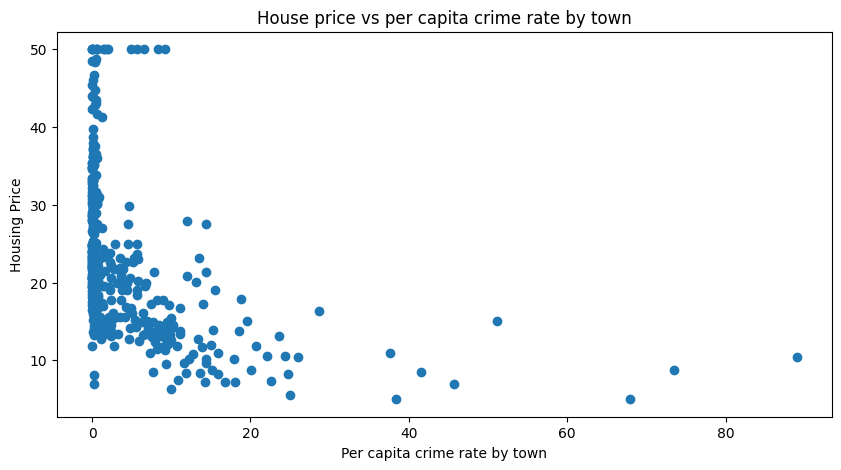

In [18]:
plt.figure(figsize=(10, 5))

plt.scatter(data.crim,data.medv)
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Housing Price")
plt.title("House price vs per capita crime rate by town");

From the plot above shows the lesser the per capita crime rate by town the more the house prices fall betwween $12-40"safe neighbour hood the expensive the house".
Which implies the higher the crime rate by town the cheaper houses to find.

#### 5.3 Housing prices vs average number of rooms per dwelling

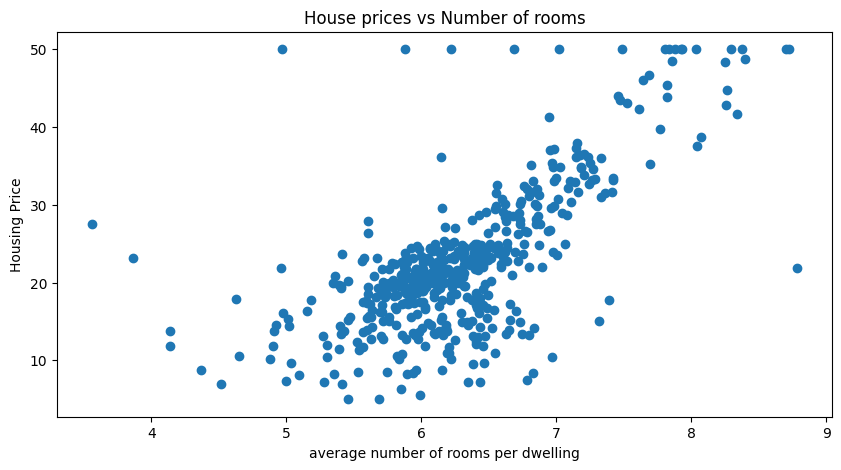

In [19]:
plt.figure(figsize=(10,5))

plt.scatter(data.rm,data.medv)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("House prices vs Number of rooms");

From our dataset most house prices at between 20-30,have an average of 6-7 rooms with some few(outliers) exceptional ones at 50$.

The more the number of rooms above 7 in a house the higher the price ranging between above $30 -50.

#### 5.4 Housing Prices vs 5 Boston employment centres

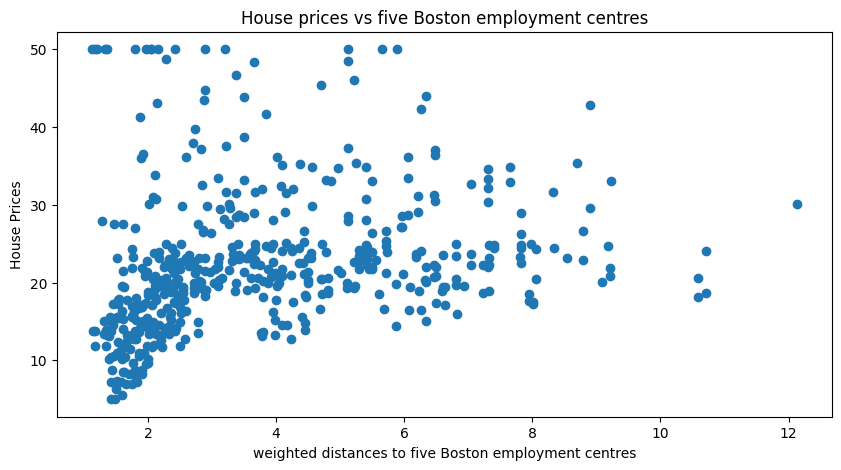

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(data.dis,data.medv)
plt.xlabel("weighted distances to five Boston employment centres")
plt.ylabel("House Prices")
plt.title("House prices vs five Boston employment centres");

The house prices around $5-30 fall between 1-6 weighted distances to the 5 Boston employment centers.

The nearer the house to the employment center the likely the price to be cheaper.

#### 5.5  Housing pricing vs to Age of the house

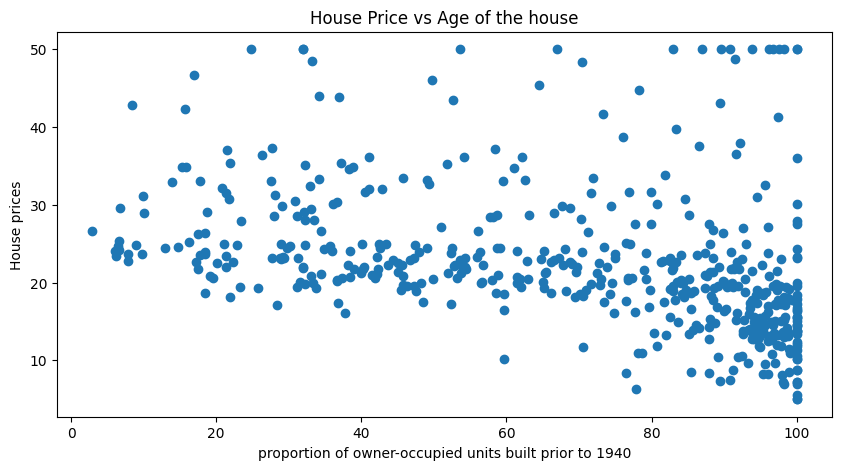

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(data.age,data.medv)
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("House prices")
plt.title("House Price vs Age of the house");

The older the Age proportion of owner-occupied units built prior to 1940 the cheaper it is price ranging between $10-20.

Most of the proportion of owner-occupied units built prior to 1940 range between 80-100.

#### 5.6 House prices vs pupil-teacher ratio by town.

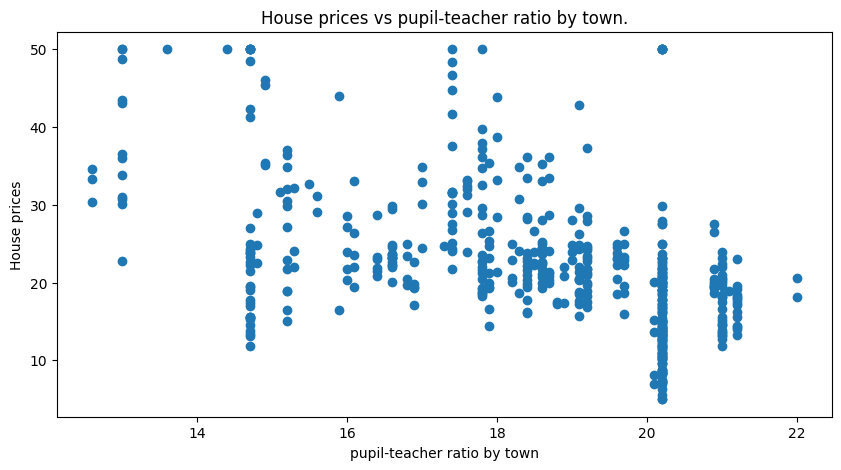

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(data.ptratio ,data.medv)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("House prices")
plt.title("House prices vs pupil-teacher ratio by town.");

Houses where the pupil-teacher ration by town is high the majority of the house prices range between $5-25.

These can be understood as the few pupils to teacher ration the higher the prices of houses in that town (A narrative of public vs private schools) on impact of nearby houses.

#### 5.7 Correlation Matrix

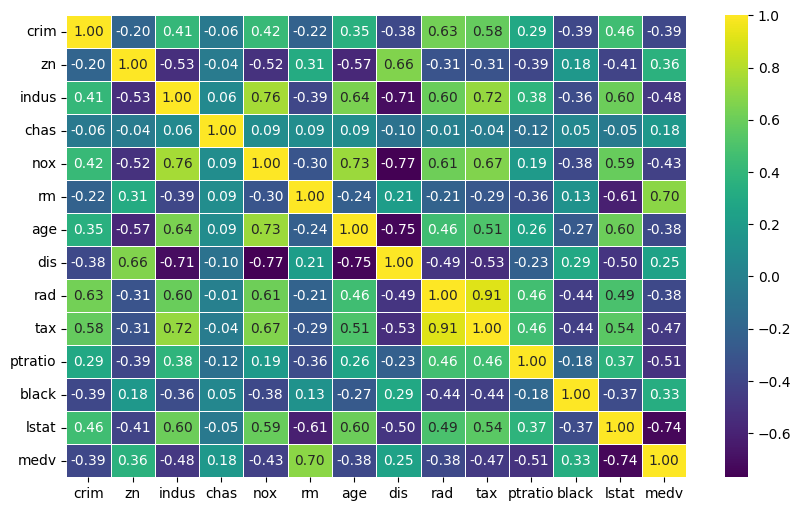

In [21]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="viridis");


There is a strong positive correlation between the house price and the average number of rooms per dwelling at 0.69 followed by the correlation between the house price and ZN(proportion of residential land zoned for lots over 25,000 sq.ft.) at 0.4 ,DIS(weighted distances to five Boston employment centres) at 0.37 and B( - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town) at 0.36 in correlation to house price.

The house feature with the strong negative correlation is LSTAT (% lower status of the population) at -0.76 .

## 6. Model Builing

Our data being in continous  (not categorical) in nature (house prices) we shall use regression models in predicting the house prices.

First we  define our data into feature variables and target variable then later split them into training and testing data then train our models on the training data(seen) before evaluating them on the testing data(unseen).

In [35]:
df.drop=['tax','dis']

In [36]:
#Difine our feature varibles and target variable
X=data.drop("medv",axis=1)
y=data["medv"]

In [37]:
#splitting our data into training and test
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

####  6.1 Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate our model
lin_reg = LinearRegression()

# Fit training data into our model
lin_reg.fit(X_train, y_train)

# Use our model to predict with training data
train_preds = lin_reg.predict(X_train)

# Use our model to predict with test data
test_preds = lin_reg.predict(X_test)

# Evaluate our model's performance using mean squared error
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Evaluate our model's performance using mean absolute error
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

# Evaluate our model's performance using r2_score
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("Linear Regression")
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)


Linear Regression
Train Mean Squared Error: 21.641412753226312
Test Mean Squared Error: 24.291119474973478
Train Mean Absolute Error: 3.314771626783228
Test Mean Absolute Error: 3.189091965887837
Train R2 Score: 0.7508856358979673
Test R2 Score: 0.6687594935356326


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate our model
lin_reg = LinearRegression()

# Fit training data into our model
lin_reg.fit(X_train, y_train)

# Use our model to predict with test data
l_preds = lin_reg.predict(X_test)

# Evaluate our model's performance using mean squared error
mse = mean_squared_error(y_test, l_preds)

# Evaluate our model's performance using mean absolute error
mae = mean_absolute_error(y_test, l_preds)

# Evaluate our model's performance using r2_score
R2_score = r2_score(y_test, l_preds)

print("Linear Regression")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", R2_score)

# Show predicted vs. actual for the first 20 rows
comparison = pd.DataFrame({'Actual': y_test[:20], 'Predicted': l_preds[:20]})
print("\nPredicted vs. Actual for the first 20 rows:")
print(comparison)


Linear Regression
Mean Squared Error: 24.291119474973478
Mean Absolute Error: 3.189091965887837
R2 Score: 0.6687594935356326

Predicted vs. Actual for the first 20 rows:
     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880
76     20.0  23.254429
316    17.8  17.662538
140    14.0  14.341190
471    19.6  23.013207
500    16.8  20.632456
218    21.5  24.908505
9      18.9  18.638836
414     7.0  -6.088422
78     21.2  21.758347
323    18.5  19.239226
473    29.8  26.193197
124    18.8  20.647733
388    10.2   5.794727
195    50.0  40.500340
448    14.1  17.612891
